In [1]:
from scipy.stats import f_oneway
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


C:\Users\Teerawat\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load data and check overview of data
df = pd.read_csv('C:/Chanwanich/NIA_e_commerce/Knowlage center/Score_evaluation.csv')
df

,DI,Segment_A,Segment_B,Segment_C
0,1,65,76,80
1,2,66,81,81
2,3,70,89,99
3,4,77,71,91
4,5,71,88,95
5,6,73,89,99
6,7,66,86,85
7,8,68,79,86
8,9,69,90,88
9,10,71,78,95


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   DI         24 non-null     int64
 1   Segment_A  24 non-null     int64
 2   Segment_B  24 non-null     int64
 3   Segment_C  24 non-null     int64
dtypes: int64(4)
memory usage: 896.0 bytes


In [4]:
print(df.describe())

              DI  Segment_A  Segment_B  Segment_C
count  24.000000  24.000000  24.000000  24.000000
mean   12.500000  67.750000  81.416667  88.041667
std     7.071068   4.551636   6.697934   7.080157
min     1.000000  53.000000  63.000000  76.000000
25%     6.750000  66.000000  78.000000  81.000000
50%    12.500000  68.000000  80.500000  88.000000
75%    18.250000  70.250000  88.000000  93.500000
max    24.000000  77.000000  90.000000  99.000000


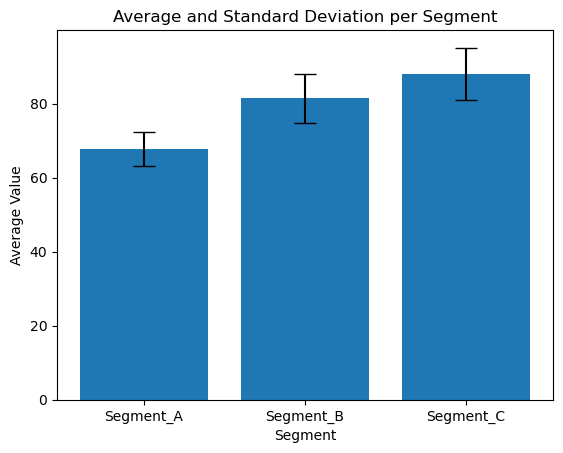

In [5]:
# Calculate the average and standard deviation for each segment
avg_segment_a = df['Segment_A'].mean()
avg_segment_b = df['Segment_B'].mean()
avg_segment_c = df['Segment_C'].mean()

std_segment_a = df['Segment_A'].std()
std_segment_b = df['Segment_B'].std()
std_segment_c = df['Segment_C'].std()

# Create a new DataFrame with averages and standard deviations
stats_data = {'Segment': ['Segment_A', 'Segment_B', 'Segment_C'],
              'Average': [avg_segment_a, avg_segment_b, avg_segment_c],
              'Standard Deviation': [std_segment_a, std_segment_b, std_segment_c]}

stats_df = pd.DataFrame(stats_data)

# Plot the bar graph with error bars for standard deviation
plt.bar(stats_df['Segment'], stats_df['Average'], yerr=stats_df['Standard Deviation'], capsize=8)

# Add title and labels to the graph
plt.title('Average and Standard Deviation per Segment')
plt.xlabel('Segment')
plt.ylabel('Average Value')

# Display the bar graph
plt.show()

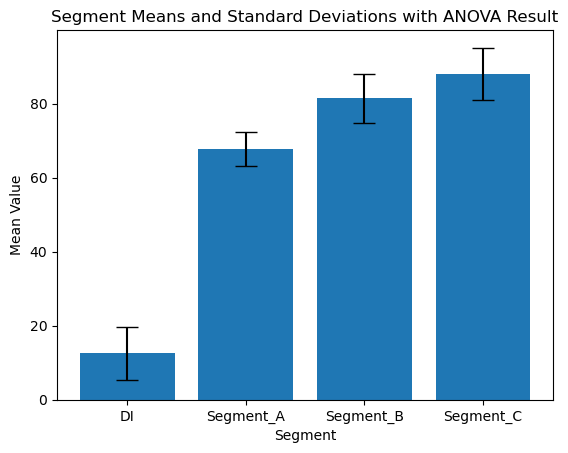

ANOVA Result: Significant difference between means
p-Value = 7.712100529141536e-17
f-score = 66.62477493698238


In [6]:
f_stat, p_value = f_oneway(df['Segment_A'], df['Segment_B'], df['Segment_C'])

# Check if there is a significant difference between the means
alpha = 0.05
if p_value < alpha:
    result = "Significant difference between means"
else:
    result = "No significant difference between means"

# Calculate the means and standard deviations
means = df.mean()
stds = df.std()

# Plot the means with error bars for standard deviations
plt.bar(means.index, means.values, yerr=stds.values, capsize=8)

# Add title, labels, and ANOVA result as text
plt.title('Segment Means and Standard Deviations with ANOVA Result')
plt.xlabel('Segment')
plt.ylabel('Mean Value')


# Display the plot
plt.show()
print("ANOVA Result:",result)
print("p-Value =", p_value)
print("f-score =", f_stat)